In [1]:
#installing the wordcloud and tweepy library

!pip install wordcloud
!pip install tweepy

In [2]:
#importing the libraries

import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
#Reading the dataset

data=pd.read_csv("twitter_training.csv")
data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
#changing the columns of the dataset for further analysis

columns=['ID', 'Topic', 'Sentiment', 'Textdata']
data = pd.read_csv("twitter_training.csv",names=columns)

In [30]:
data

,ID,Topic,Sentiment,Textdata
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
#describing the dataset

data.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [32]:
#information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Textdata   73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [33]:
#checking for the null values

data.isnull().sum()

ID             0
Topic          0
Sentiment      0
Textdata     686
dtype: int64

In [35]:
data.dropna(inplace=True)

In [36]:
data.isnull().sum()

ID           0
Topic        0
Sentiment    0
Textdata     0
dtype: int64

In [37]:
#checking for the duplicate values

data.duplicated().sum()

2340

In [38]:
#removing the duplicated values

data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [40]:
#cleaning the data

import re

def clean_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet)     # Remove mentions
    tweet = re.sub(r'#\w+', '', tweet)     # Remove hashtags
    tweet = re.sub(r'\n', ' ', tweet)      # Remove line breaks
    tweet = re.sub(r'[^\w\s]', '', tweet)  # Remove special characters
    return tweet

data['Cleaned_Text'] = data['Textdata'].apply(clean_tweet)

In [44]:
#performing the sentiment analysis

sid = SentimentIntensityAnalyzer()

def analyze_sentiment(tweet):
    scores = sid.polarity_scores(tweet)
    return scores['compound']

data['Sentiment'] = data['Cleaned_Text'].apply(analyze_sentiment)
data['Sentiment_Label'] = data['Sentiment'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

# Displaying  the first few rows to check the results
print(data[['Textdata', 'Cleaned_Text', 'Sentiment', 'Sentiment_Label']].head())

                                            Textdata  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                        Cleaned_Text  Sentiment  \
0  im getting on borderlands and i will murder yo...    -0.6908   
1  I am coming to the borders and I will kill you...    -0.6908   
2  im getting on borderlands and i will kill you all    -0.6908   
3  im coming on borderlands and i will murder you...    -0.6908   
4  im getting on borderlands 2 and i will murder ...    -0.6908   

  Sentiment_Label  
0        Negative  
1        Negative  
2        Negative  
3        Negative  
4        Negative  


In [ ]:
#visualizing the sentiment atterns

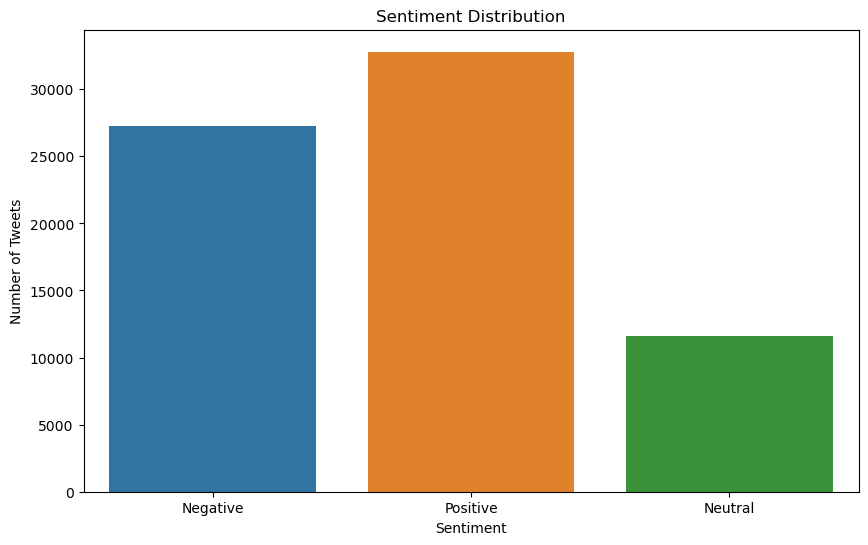

In [49]:
#sentiment distribution by countplot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment_Label', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

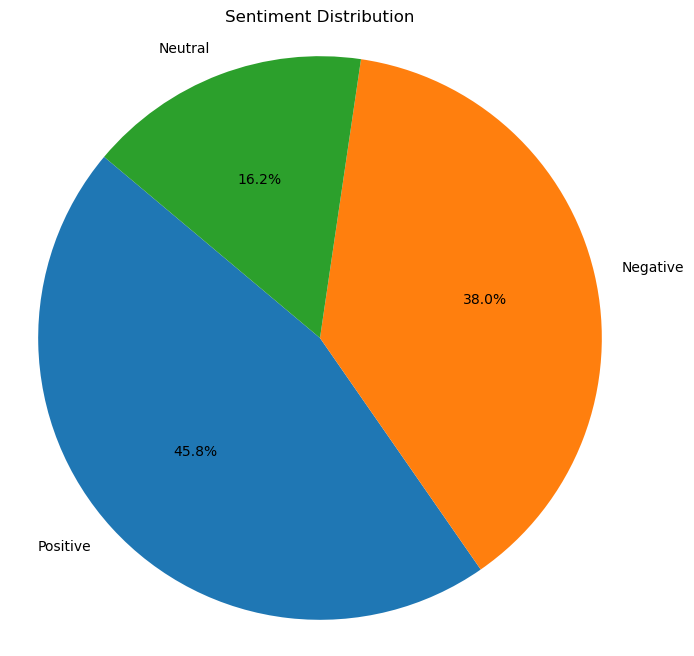

In [54]:
#sentiment distribution using pie chart

sentiment_counts = data['Sentiment_Label'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

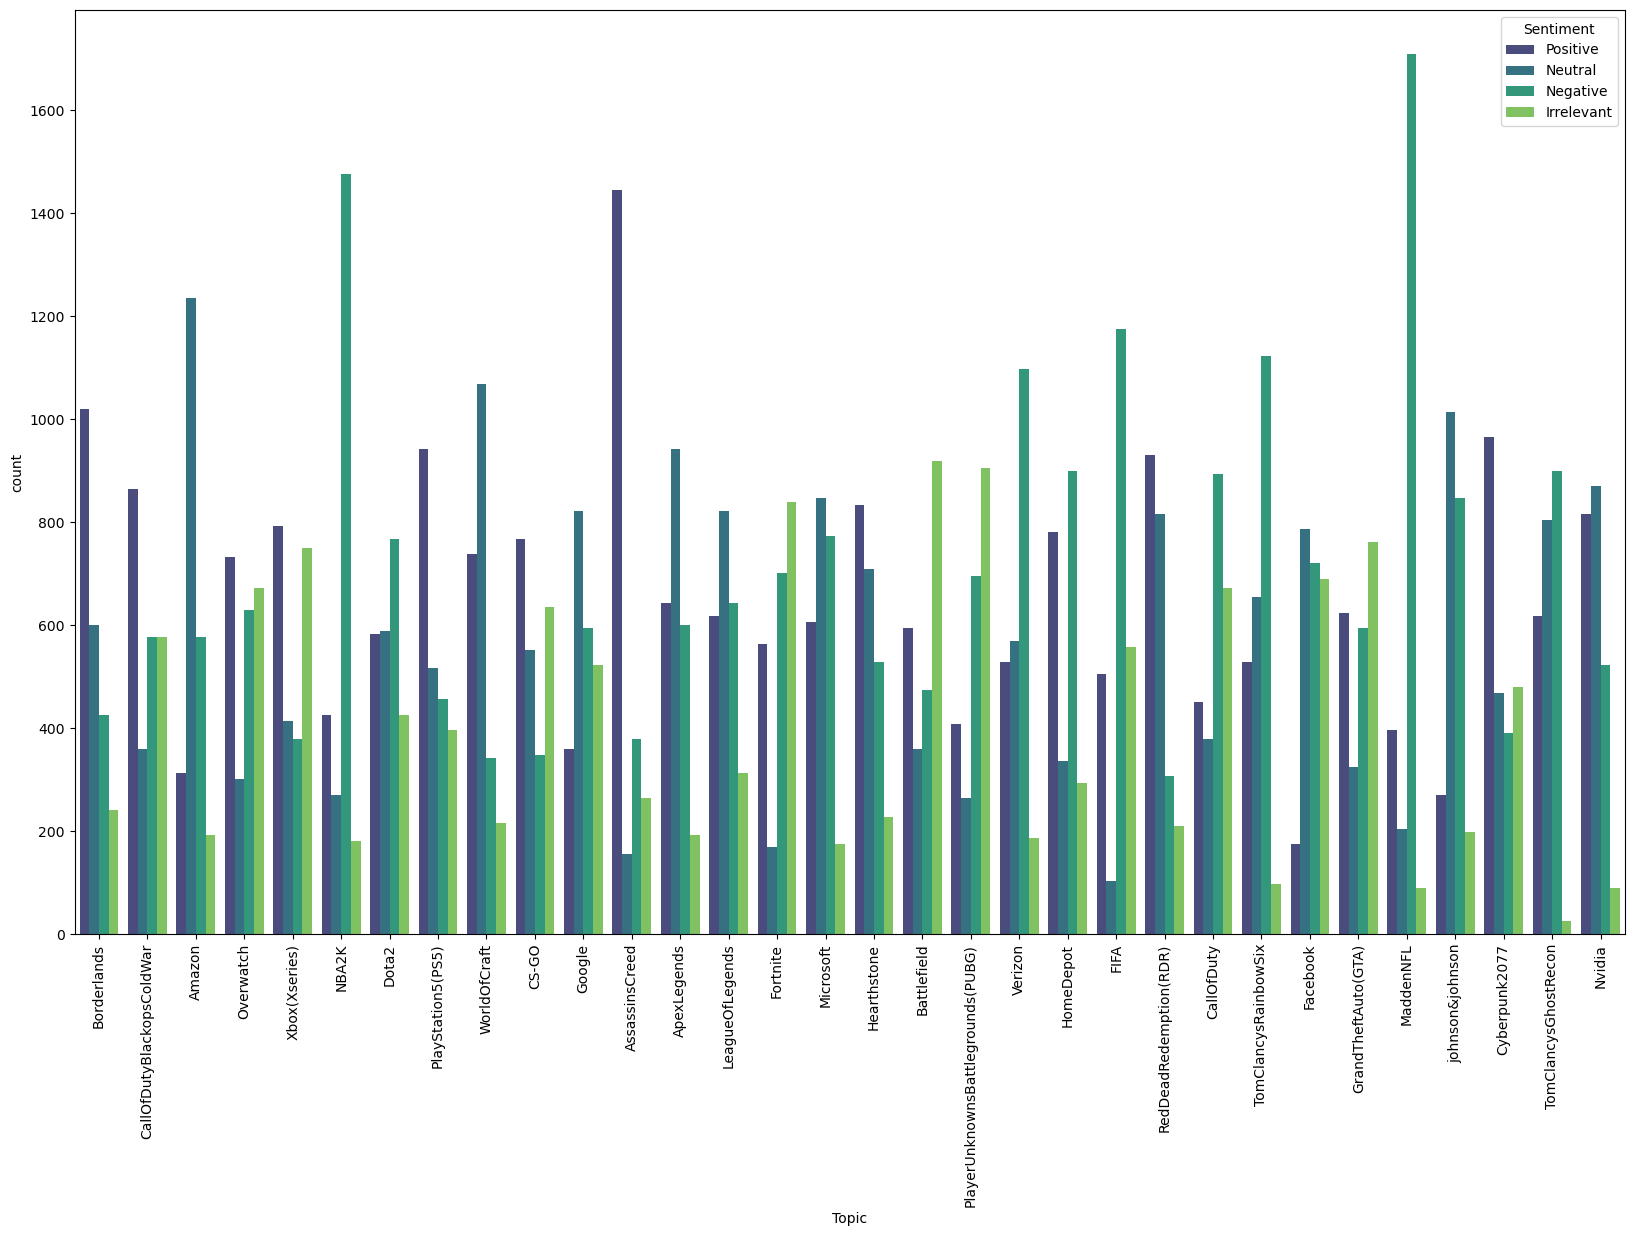

In [6]:
#sentiment distribution topicwise by countplot

plt.figure(figsize=(20,12))
sns.countplot(x='Topic',data=data,palette='viridis',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

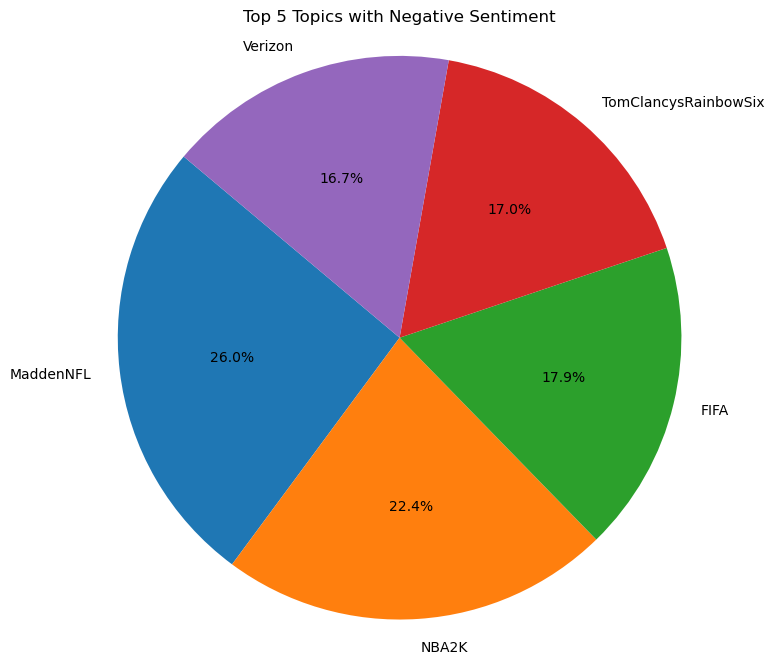

In [23]:
#NEGATIVE SENTIMENTS
#plotting the pie chart
 
#filtering the negative sentiments

negative_data = data[data['Sentiment'] == 'Negative']

#counting the topics

topic_counts = negative_data['Topic'].value_counts()

#selecting the top five topics

top_5_topics = topic_counts.head(5)


plt.figure(figsize=(8, 8))
plt.pie(top_5_topics, labels=top_5_topics.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Topics with Negative Sentiment')
plt.axis('equal')
plt.show()

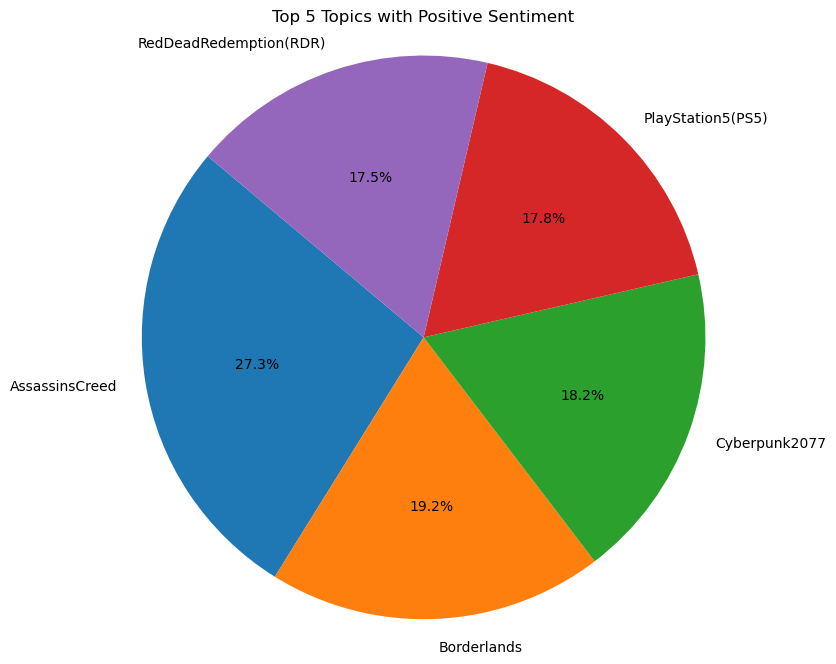

In [15]:
#POSITIVE SENTIMENTS
#plotting the pie chart

#filtering the positive data

positive_data = data[data['Sentiment'] == 'Positive']

#counting the topics

topic_counts = positive_data['Topic'].value_counts()

#selecting the top five topics

top_5_topics = topic_counts.head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5_topics, labels=top_5_topics.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Topics with Positive Sentiment')
plt.axis('equal')
plt.show()

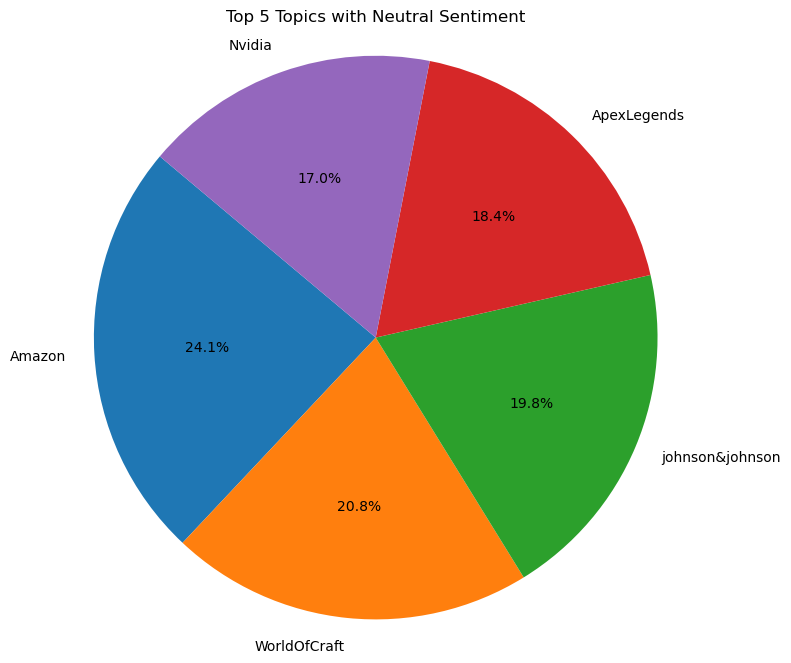

In [21]:
#NUETRAL SENTIMENTS
#plotting the pie chart

#filtering the positive data

neutral_data = data[data['Sentiment'] == 'Neutral']

#counting the topics

topic_counts = neutral_data['Topic'].value_counts()

#selecting the top five topics

top_5_topics = topic_counts.head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5_topics, labels=top_5_topics.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Topics with Neutral Sentiment')
plt.axis('equal')
plt.show()

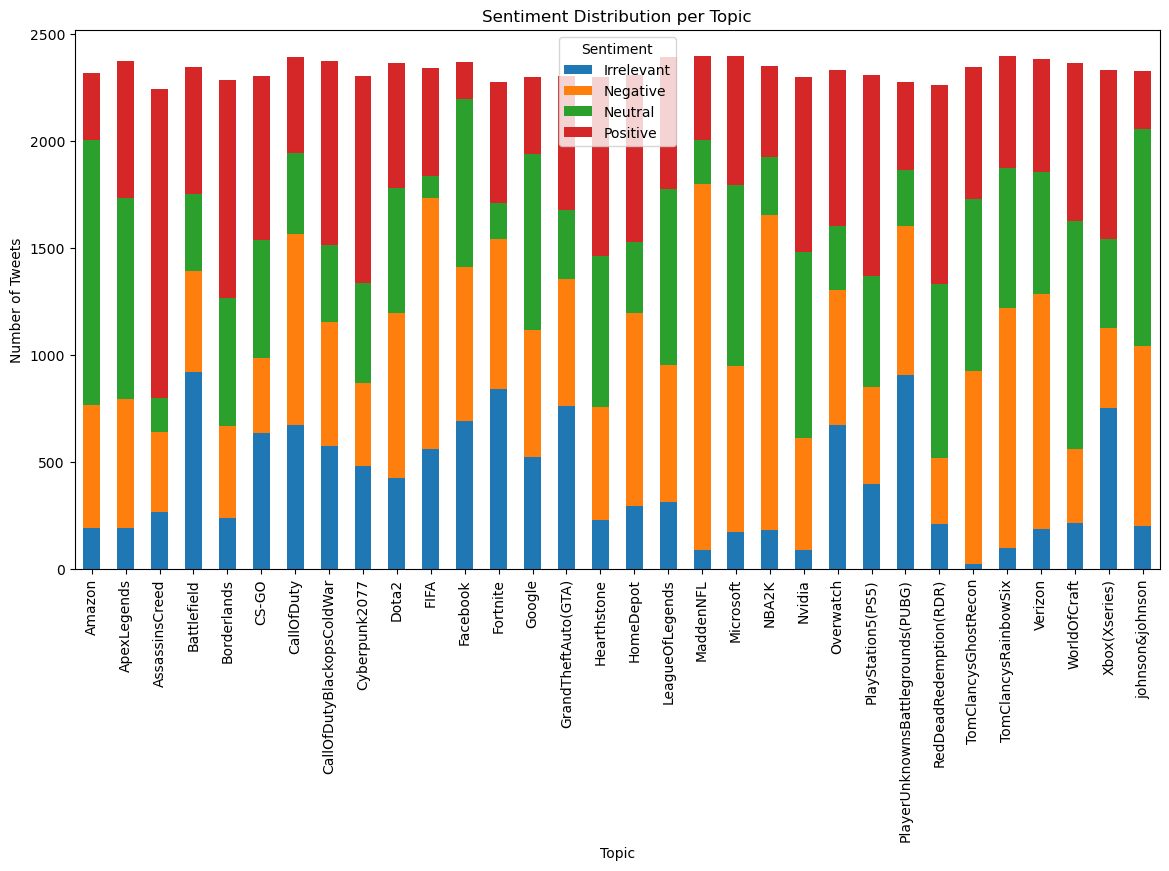

In [24]:
#sentiment distribution per topic

topic_sentiment_counts = data.groupby(['Topic', 'Sentiment']).size().unstack()

topic_sentiment_counts.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Sentiment Distribution per Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Tweets')
plt.show()

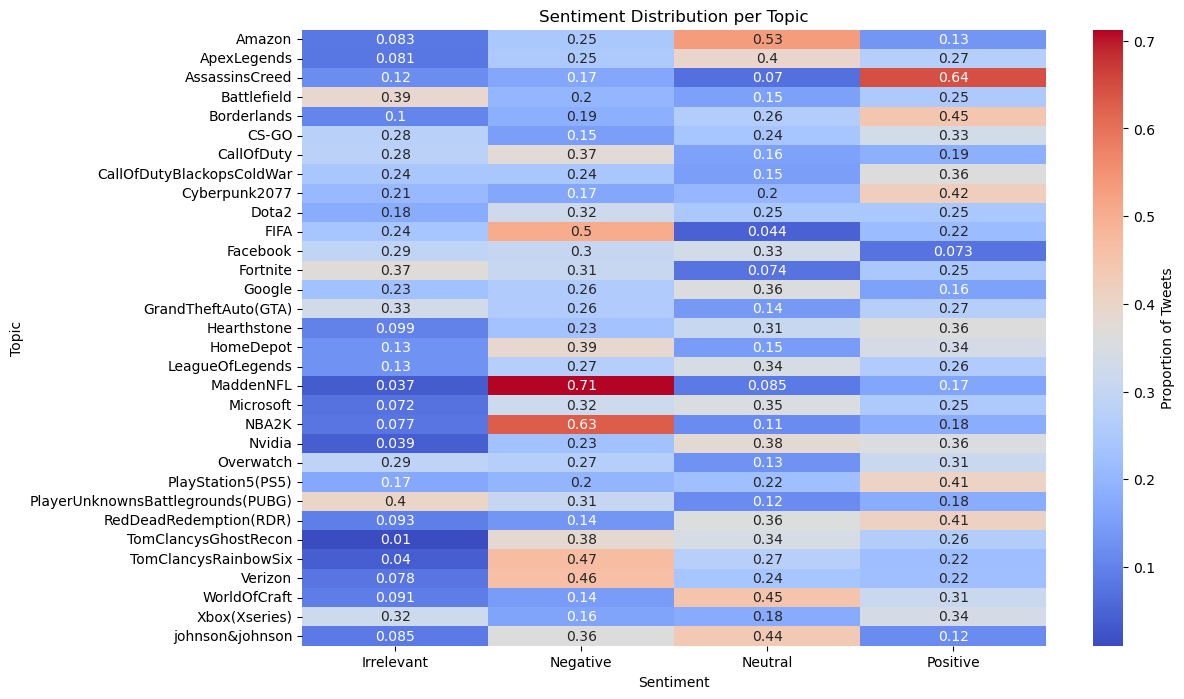

In [32]:
#creating the crosstab

crosstab = pd.crosstab(data['Topic'], data['Sentiment'])

#normalizing the crosstab
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)

#plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_normalized, annot=True, cmap='coolwarm', cbar_kws={'label': 'Proportion of Tweets'})
plt.title('Sentiment Distribution per Topic')
plt.xlabel('Sentiment')
plt.ylabel('Topic')
plt.show()